In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('./Image_classification_data/data_labels_mainData.csv')
data_extra = pd.read_csv('./Image_classification_data/data_labels_extraData.csv')

In [21]:
data['isCancerous'].unique()

array([0, 1])

In [22]:
data_extra['isCancerous'].unique()

array([0, 1])

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

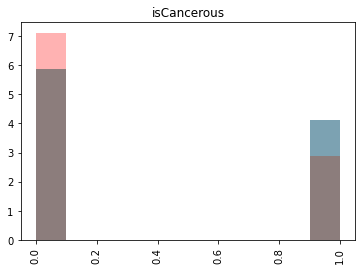

In [18]:
plt.hist(data['isCancerous'], alpha=0.3, color='b', density=True)
plt.hist(data_extra['isCancerous'], alpha=0.3, color='r', density=True)
plt.hist(data['isCancerous'], alpha=0.3, color='g', density=True)
plt.title('isCancerous')
plt.xticks(rotation='vertical')